In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

### Q1 Read the input file and check the data dimension

In [5]:
ger_cre=pd.read_csv("german_credit.csv")
credit.shape

(1000, 21)

In [6]:
ger_cre.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
ger_cre.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [8]:
ger_cre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [114]:
ger_cre.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


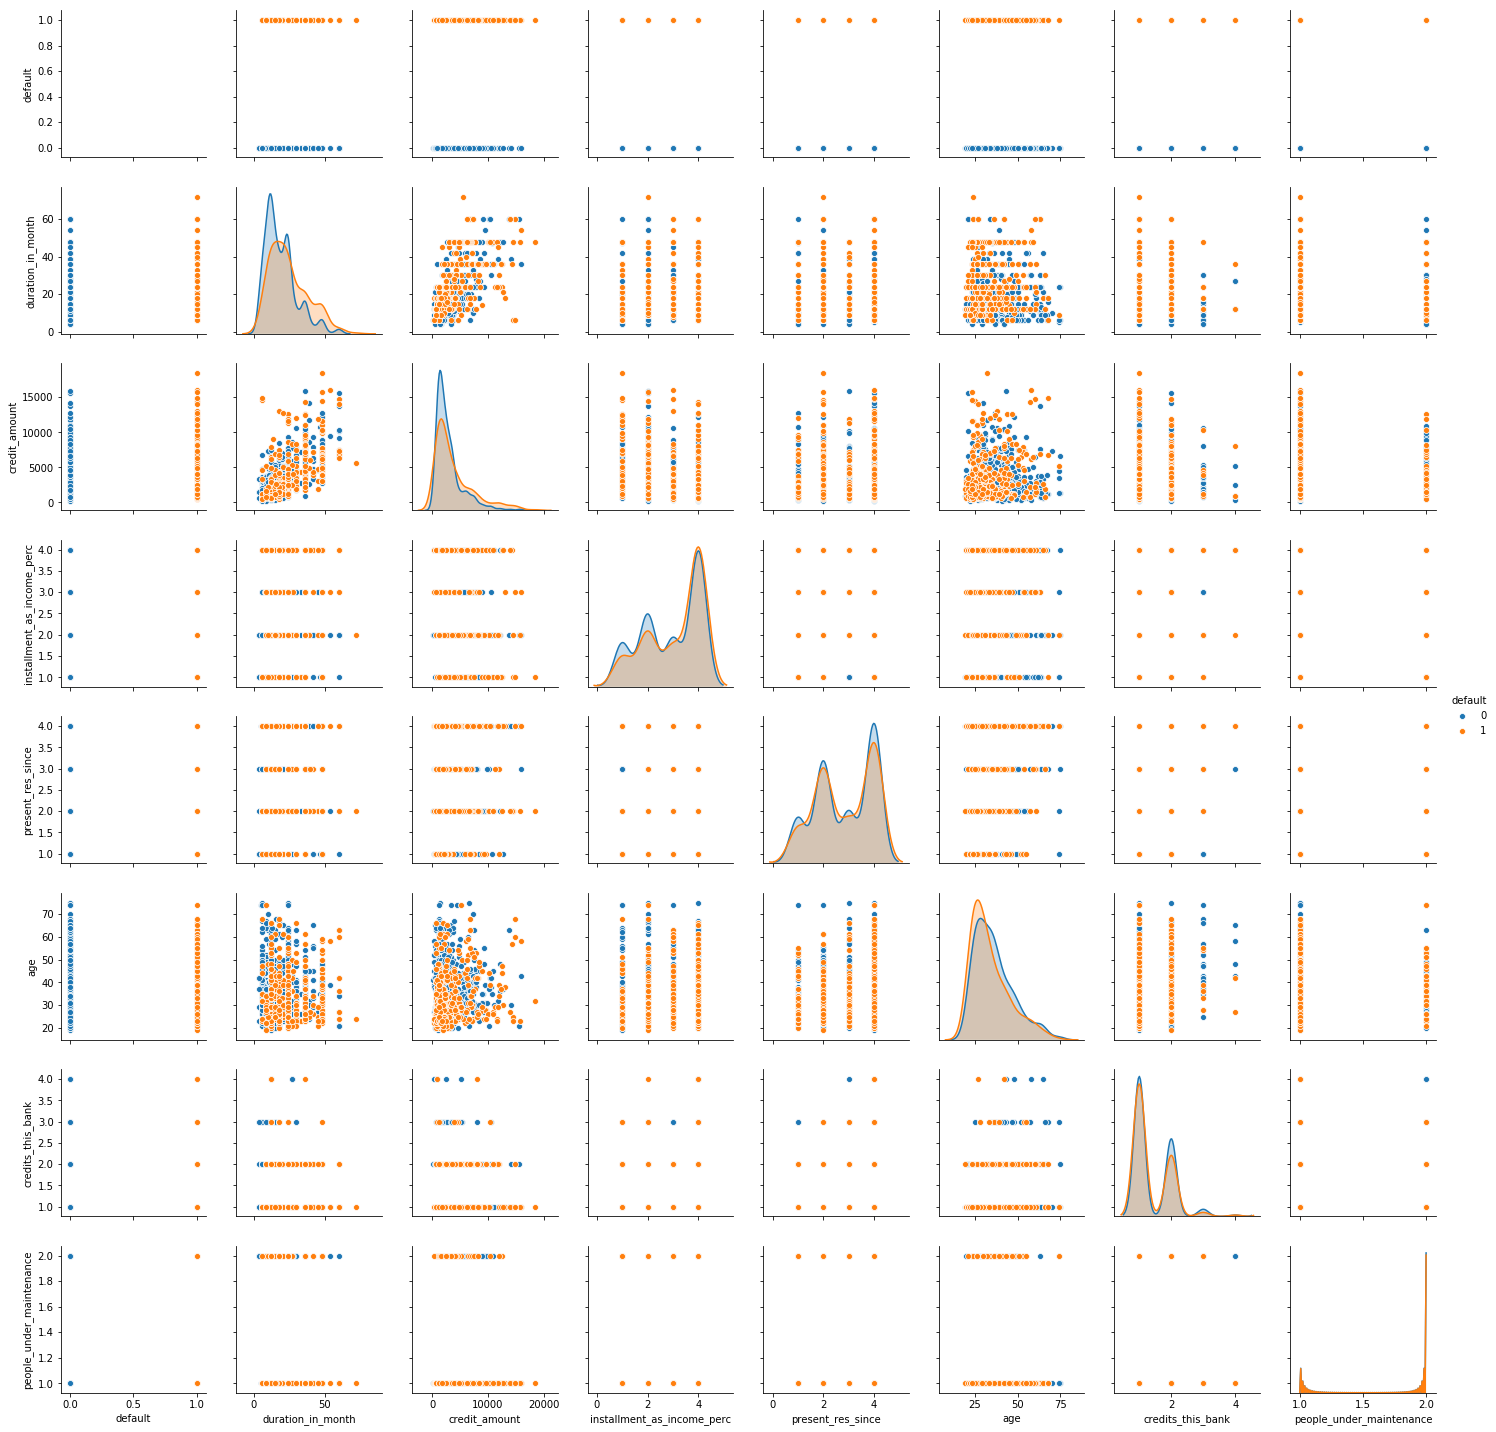

In [115]:
#Analysis of Relationship between variables
sns.pairplot(ger_cre, hue = "default")

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
# Print Shape of model data

(500, 61)

In [117]:
ger_cre.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [10]:

# credit_nonNum=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker']
# credit_dummies = pd.get_dummies( credit,columns = credit_nonNum,dtype='int' )
# credit_dummies.info()



In [118]:
categorical_feature_mask = ger_cre.dtypes==object
categorical_cols = ger_cre.columns[categorical_feature_mask]
dummies=pd.get_dummies(ger_cre[categorical_cols])
dummies.head()

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [124]:
# #Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor = dummies.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

### Drop the original variables which are converted to dummy

In [125]:
ger_concat=pd.concat([ger_cre,dummies],axis=1)
ger_concat=ger_concat.drop(columns=categorical_cols)
print(ger_concat.shape)
ger_concat.head()

(1000, 62)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [126]:
ger_concat.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


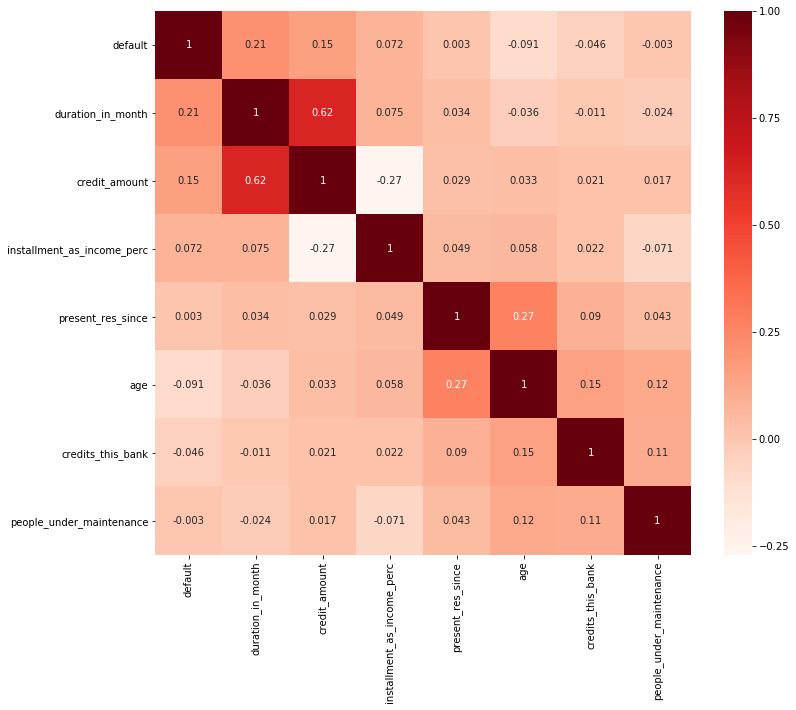

In [128]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = ger_cre.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [130]:
X = ger_concat.drop(columns="default")
y = ger_concat["default"]
X.head(5)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [42]:
y.head(5)

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [37]:
#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

print("Data in Training:",X_train.shape)
print("Data in Test:",X_test.shape)

Data in Training: (700, 61)
Data in Test: (300, 61)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [135]:
from sklearn.ensemble import RandomForestClassifier

modelrandom=RandomForestClassifier(max_depth=10,n_estimators=500, random_state=9999, criterion="entropy", n_jobs=2)
rml2 = modelrandom.fit(X,y)
rml2


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [70]:
pred = modelrandom.predict(X_test)
print(pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0]


In [136]:
print(rml2.predict)

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)>


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[194   7]
 [ 75  24]]


In [161]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#y_predict = rml2.predict(X_test)
print(rml2.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, pred))

0.77
[[194   7]
 [ 75  24]]


In [141]:
print(accuracy_score(y_test, pred))

0.7266666666666667


In [140]:
modelrandom.score(X_test,y_test)

0.9366666666666666

### Q6 Show the list of the features importance( 1 Marks)

In [73]:
import pandas as pd
feature_importances = pd.DataFrame(modelrandom.feature_importances_, index = X_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)
feature_importances

,Importance
age,0.092475
credit_amount,0.092005
duration_in_month,0.062733
account_check_status_no checking account,0.053458
present_res_since,0.037142
installment_as_income_perc,0.034771
account_check_status_< 0 DM,0.033692
credit_history_critical account/ other credits existing (not at this bank),0.020591
personal_status_sex_female : divorced/separated/married,0.019089
credits_this_bank,0.018925


In [143]:
print(rml2.feature_importances_)

[0.07968242 0.09117795 0.03076873 0.02787834 0.07452464 0.01810423
 0.01082309 0.01796458 0.04094316 0.00826808 0.07607972 0.01177178
 0.02575982 0.00956902 0.01226442 0.01161886 0.00799793 0.00927771
 0.01696585 0.01185581 0.01351019 0.00347549 0.00220058 0.00958476
 0.00162032 0.00112149 0.00642773 0.02186503 0.00806232 0.00638408
 0.01628745 0.01188737 0.01321388 0.01211656 0.01154847 0.00831704
 0.01365156 0.00643691 0.00633973 0.01365149 0.0063386  0.00872301
 0.00922915 0.01160346 0.01133363 0.01544756 0.01393453 0.0153494
 0.0166321  0.00668349 0.0078559  0.01351304 0.01037977 0.01188405
 0.01344268 0.00258526 0.01015981 0.01234444 0.01273324 0.00456777
 0.00426053]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [145]:
# Use below values
num_folds = 10
seed = 77

In [97]:
from sklearn.model_selection import StratifiedKFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [103]:
cc = 1
for train_index, test_index in kf.split(X):
    print("Round   :  ", cc, ":",)
    print("Training Indices : ", train_index)
    print("Testing Indices : ", test_index)
    cc +=1

Round   :   1 :
Training Indices :  [234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 47

In [0]:
#Validate the Random Forest model build above using k fold

In [149]:
ger_score=[]

ger_kflod=KFold(n_splits=num_folds,random_state=seed)

for train,_ in ger_kflod.split(X_train,y_train):
    clf_g = modelrandom.fit(X_train.iloc[train,:], y_train.iloc[train])
    ger_score.append(clf_g.score(X_test , y_test))

In [150]:
col=[]
for i in range(1,11):
    j='Fold '+ str(i)
    col.append(j)
Model_score_KFold=pd.DataFrame(ger_score).T
Model_score_KFold.columns=col
print('Model Score for 10 Folds are listed blow:')
Model_score_KFold

Model Score for 10 Folds are listed blow:


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10
0,0.77,0.77,0.766667,0.766667,0.763333,0.766667,0.77,0.756667,0.753333,0.766667


In [0]:
#Calculate Mean score

In [151]:
avg_score = np.mean(ger_score)
print(avg_score)

0.7649999999999999


In [0]:
# Calculate score standard deviation using std()

In [153]:
std = np.std(ger_score)
std

0.005426273532033248

Text(0.5, 1.0, 'Histogram of Data')

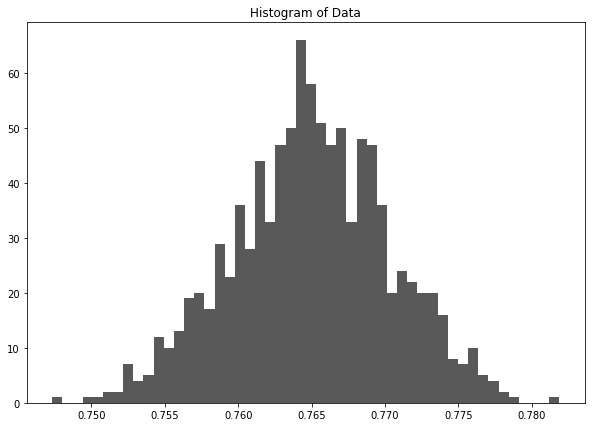

In [154]:
# Histogram of the Data

N = 1000
dataset = np.random.normal(loc = avg_score, scale = std, size = N)
f , ax = plt.subplots(figsize=(10,7))
ax.hist(dataset, color='k', alpha=.65, histtype='stepfilled', bins = 50)
ax.set_title("Histogram of Data")

# Q8 Print the confusion matrix( 1 Marks)

In [162]:
ger_score=[]

ger_kflod=KFold(n_splits=10,random_state=77)
i=1
for train,_ in ger_kflod.split(X_train,y_train):
    clf_g = modelrandom.fit(X_train.iloc[train,:], y_train.iloc[train])
    y_predict = rml2.predict(X_test)
    i=0+i
    print('Confusion matrics for Fold'+str(i),':\n',metrics.confusion_matrix(y_test, y_predict))
    i=i+1

Confusion matrics for Fold1 :
 [[191  10]
 [ 59  40]]
Confusion matrics for Fold2 :
 [[189  12]
 [ 57  42]]
Confusion matrics for Fold3 :
 [[195   6]
 [ 64  35]]
Confusion matrics for Fold4 :
 [[192   9]
 [ 61  38]]
Confusion matrics for Fold5 :
 [[194   7]
 [ 64  35]]
Confusion matrics for Fold6 :
 [[194   7]
 [ 63  36]]
Confusion matrics for Fold7 :
 [[189  12]
 [ 57  42]]
Confusion matrics for Fold8 :
 [[194   7]
 [ 66  33]]
Confusion matrics for Fold9 :
 [[194   7]
 [ 67  32]]
Confusion matrics for Fold10 :
 [[189  12]
 [ 58  41]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [163]:
y_predict=rml2.predict(X_test)
from sklearn.metrics import classification_report

print('Classification accuracy and sensitivity as shown below:')
pre_dat_NB=pd.DataFrame(classification_report(y_test,y_predict,output_dict=True)).T
pre_dat_NB

Classification accuracy and sensitivity as shown below:


,f1-score,precision,recall,support
0,0.843750,0.765182,0.940299,201.0
1,0.539474,0.773585,0.414141,99.0
micro avg,0.766667,0.766667,0.766667,300.0
macro avg,0.691612,0.769384,0.677220,300.0
weighted avg,0.743339,0.767955,0.766667,300.0


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

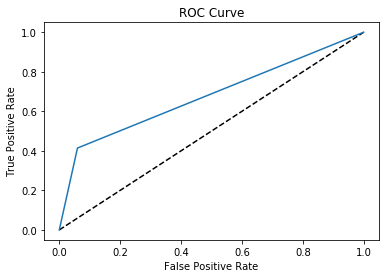

In [164]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve
# clg_g = clf.fit(x_train, y_train)
# y_predict=clf_g.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test,y_predict )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [165]:
from sklearn.metrics import roc_auc_score
# y_predict=clf_g.predict(x_test)
auc = roc_auc_score(y_test,y_predict)
print('AUC(Persentage of ROS plot that is underneath the cuve is:)', "{:.2%}".format(auc))

AUC(Persentage of ROS plot that is underneath the cuve is:) 67.72%


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [169]:
# construct a dataset of size n
np.random.seed(42)
bootstrap = np.random.randint(0,500 , size=100)
pickups

array([102, 435, 348, 270, 106,  71, 188,  20, 102, 121, 466, 214, 330,
       458,  87, 372,  99, 359, 151, 130, 149, 308, 257, 343, 491, 413,
       293, 385, 191, 443, 276, 160, 459, 313,  21, 252, 235, 344,  48,
       474,  58, 169, 475, 187, 463, 270, 189, 445, 174, 445,  50, 363,
        54, 243, 319, 130, 484, 306, 134,  20, 328, 166, 273, 387,  88,
       315,  13, 241, 264, 345,  52, 385, 339,  91, 366, 443, 454, 427,
       263, 430,  34, 205,  80, 419,  49, 359, 387,   1, 389,  53, 105,
       259, 309, 476, 190, 401, 217,  43, 161, 201])

In [170]:
# population standard deviation
bootstrap.std()

144.25342283634035

In [171]:
# draw a sample from population
sample = np.random.choice(bootstrap, size=30)
sample

array([166, 201, 458, 190, 445,  87, 385, 427, 387, 166, 474,  49, 430,
       205,  54, 343, 413, 389,  20,  58, 191,  87, 463,  88, 389,  52,
       102,   1, 102,  20])

In [172]:
# our first sample mean
sample_mean = sample.mean()
sample_mean

228.06666666666666

In [173]:
# standard deiveation for this sample
sample_std = np.std(sample, ddof=1)
sample_std

166.96890756052164

In [174]:
# estimated standard error for sapmle mann
sample_std/(30 ** 0.5)

30.48421235763086

In [176]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

# theorical standard error for sapmle mann
pickups.std()/(30 ** 0.5)

26.336951228264823

(array([6.7000e+01, 8.4200e+02, 5.9160e+03, 1.9251e+04, 3.2273e+04,
        2.7514e+04, 1.1461e+04, 2.4320e+03, 2.3100e+02, 1.3000e+01]),
 array([145.56666667, 168.11666667, 190.66666667, 213.21666667,
        235.76666667, 258.31666667, 280.86666667, 303.41666667,
        325.96666667, 348.51666667, 371.06666667]),
 <a list of 10 Patch objects>)

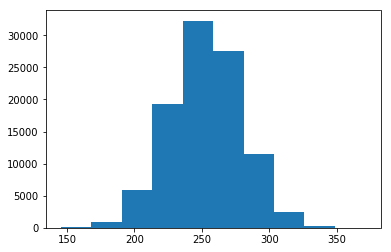

In [180]:
# construct the simulated sampling distribution
sample_props = []
for _ in range(100000):
    sample = np.random.choice(bootstrap, size=30)
    sample_props.append(sample.mean())
    
# the simulated mean of the sampling distribution
simulated_mean = np.mean(sample_props)

# the simulated standard deviation of the sampling distribution
simulated_std = np.std(sample_props)

# plot the simulated sampling distribution,
# under the Central Limit Theorem,
# it is expected normal
plt.hist(sample_props)

In [181]:

# the theorical mean and simulated mean
(pickups.mean(), simulated_mean)

(252.7, 252.65013933333333)

In [182]:
# the theorical standard error and simulated standard error
(pickups.std()/(30 ** 0.5), simulated_std)

(26.336951228264823, 26.355507277786838)

In [183]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [48]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [186]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    modelrandom.fit(X_, y_)
    y_pred = modelrandom.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [187]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7553333333333334
Standard deviation:  0.01869046102516826
